<a href="https://colab.research.google.com/github/01appy/Synthetic-Data-Visualization-with-Voice/blob/main/Final_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gTTS

 The dataset has been successfully initialized. We will now proceed with a series of visualizations to comprehensively analyze feature distributions and examine the distinctions between classes..


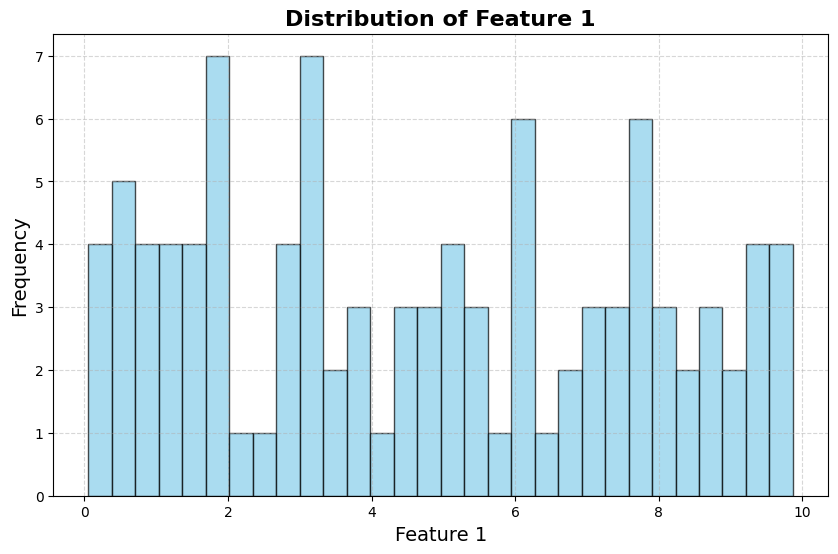

This histogram demonstrates the distribution of values in Feature 1, highlighting the frequency of occurrences across the defined range, which allows us to observe any concentration patterns or variations within this feature.


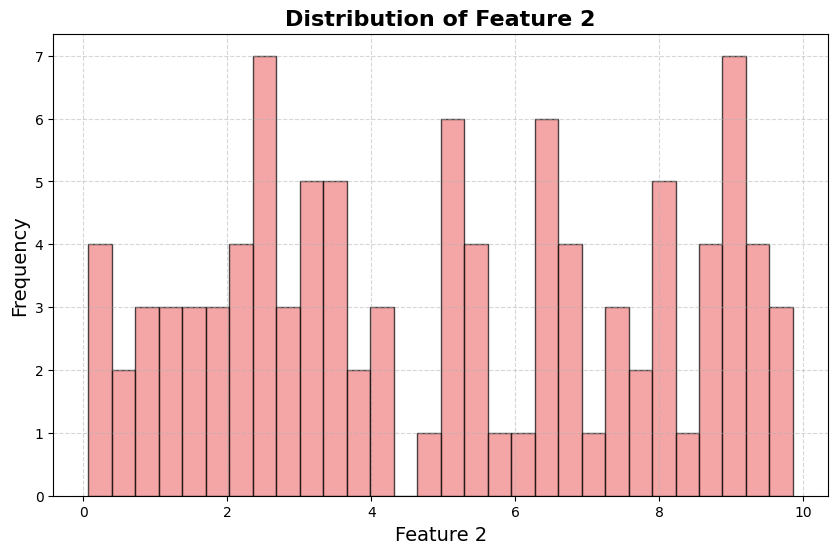

This histogram shows the distribution of Feature 2. Similar to Feature 1, it is also uniformly distributed between 0 and 10.


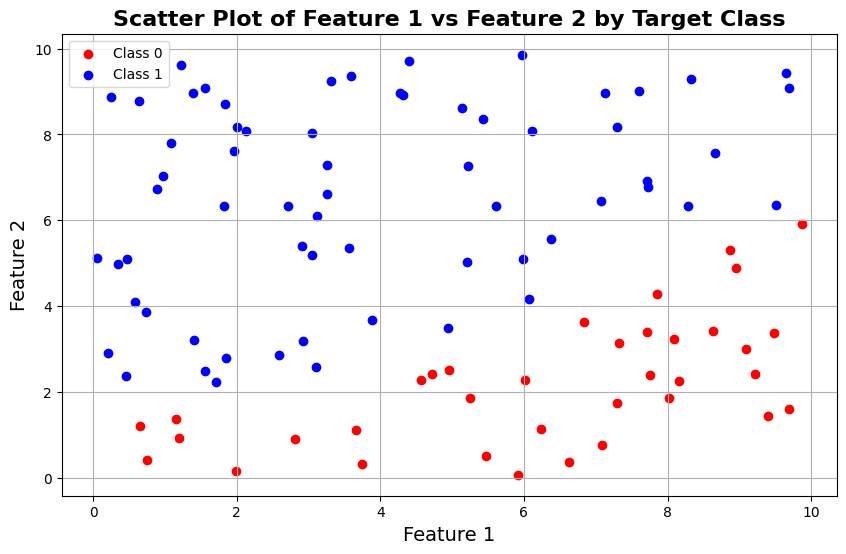

This scatter plot displays the relationship between Feature 1 and Feature 2, categorized by the target class.


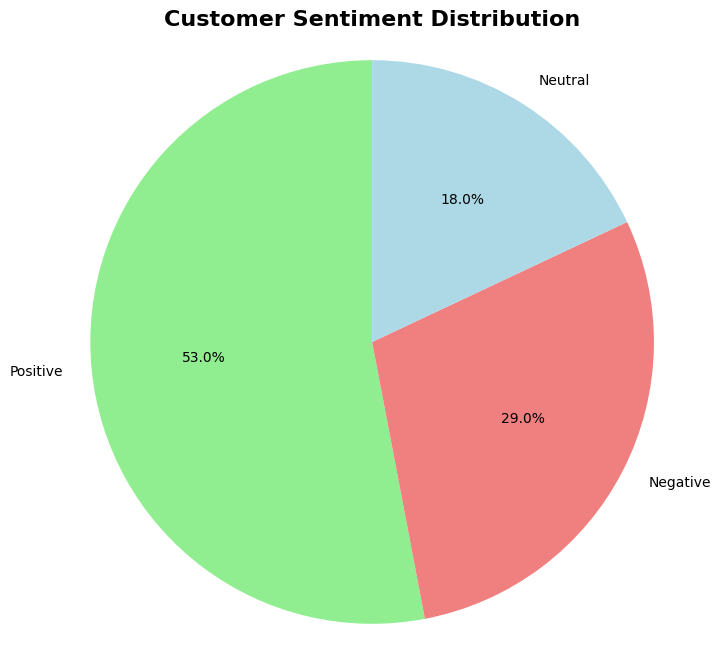

This pie chart illustrates the distribution of customer sentiments. We can see that the majority of reviews are positive, which indicates a favorable response from customers.


<ipython-input-2-7dc3b18c23fc>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='Sentiment', palette='pastel')


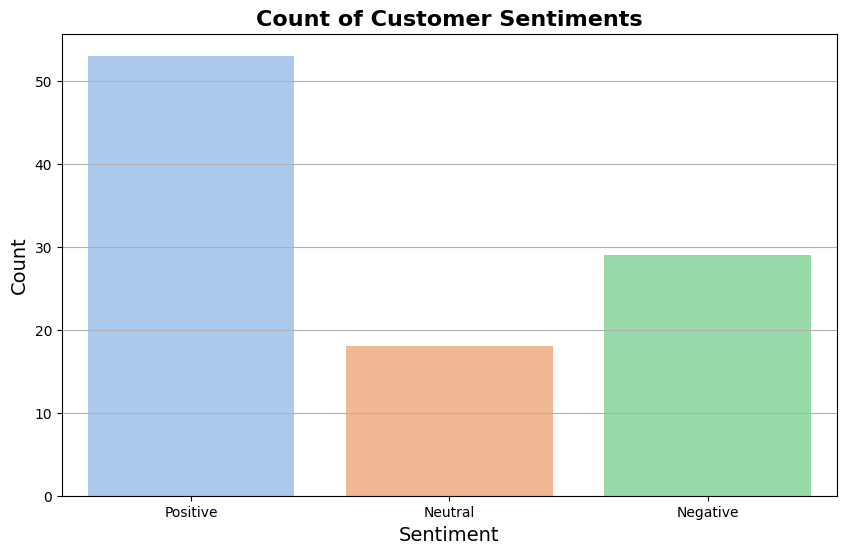

This bar chart shows the count of each sentiment category among customer reviews. It provides a clear comparison of positive, negative, and neutral sentiments.


The visual analysis of the dataset is complete. We've explored histograms, scatter plots, a pie chart, and a bar chart to understand the characteristics of features and customer sentiments.


Congratulations! You have just explored our dataset and uncovered valuable insights through various visualizations. Understanding customer sentiments is crucial for businesses, as it helps to tailor products and services according to customer feedback, ultimately enhancing customer satisfaction and driving success. Thank you  !


In [ ]:
# Step 1: Import necessary libraries and install gTTS
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from gtts import gTTS
from IPython.display import Audio, display

# Install gTTS in Google Colab if not already installed
!pip install gtts

# Step 2: Define a function to convert text to speech
def speak(text):
    print(text)  # Display the text output for reference
    tts = gTTS(text=text, lang='en')
    tts.save("output.mp3")
    display(Audio("output.mp3", autoplay=True))

# Step 3: Generate synthetic dataset for features
def generate_synthetic_data(num_samples=100):
    np.random.seed(42)
    feature_1 = np.random.rand(num_samples) * 10
    feature_2 = np.random.rand(num_samples) * 10
    target = (feature_2 > 0.5 * feature_1 + 1).astype(int)
    data = pd.DataFrame({
        'Feature_1': feature_1,
        'Feature_2': feature_2,
        'Target': target
    })
    return data

# Generate the synthetic dataset
dataset = generate_synthetic_data(num_samples=100)

# Step 4: Create synthetic customer reviews data
def generate_customer_reviews(num_reviews=100):
    np.random.seed(42)
    sentiments = np.random.choice(['Positive', 'Negative', 'Neutral'], size=num_reviews, p=[0.5, 0.3, 0.2])
    review_texts = [
        "Great product!" if sentiment == "Positive" else
        "Not what I expected." if sentiment == "Negative" else
        "It was okay." for sentiment in sentiments
    ]

    customer_data = pd.DataFrame({
        'Review': review_texts,
        'Sentiment': sentiments
    })
    return customer_data

# Generate customer reviews data
customer_reviews = generate_customer_reviews(num_reviews=100)

# Step 5: Connect to SQLite database (create if not exists) and store data
conn = sqlite3.connect('/content/synthetic_customer_data.db')
dataset.to_sql('features', conn, if_exists='replace', index=False)
customer_reviews.to_sql('customer_reviews', conn, if_exists='replace', index=False)

# Step 6: Load data from database
df_summary = pd.read_sql_query("SELECT * FROM features", conn)
df_reviews = pd.read_sql_query("SELECT * FROM customer_reviews", conn)

# Step 7: Display initial description
speak(" The dataset has been successfully initialized. We will now proceed with a series of visualizations to comprehensively analyze feature distributions and examine the distinctions between classes..")

# Visualization 1: Histogram for Feature 1
plt.figure(figsize=(10, 6))
plt.hist(df_summary['Feature_1'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Feature 1', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
speak("This histogram demonstrates the distribution of values in Feature 1, highlighting the frequency of occurrences across the defined range, which allows us to observe any concentration patterns or variations within this feature.")

# Visualization 2: Histogram for Feature 2This histogram illustrates the frequency distribution of Feature 1, showcasing how the values are spread across the range.
plt.figure(figsize=(10, 6))
plt.hist(df_summary['Feature_2'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel('Feature 2', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Feature 2', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
speak("This histogram shows the distribution of Feature 2. Similar to Feature 1, it is also uniformly distributed between 0 and 10.")

# Visualization 3: Scatter plot with class colors
plt.figure(figsize=(10, 6))
plt.scatter(df_summary[df_summary['Target'] == 0]['Feature_1'], df_summary[df_summary['Target'] == 0]['Feature_2'],
            color='red', label='Class 0')
plt.scatter(df_summary[df_summary['Target'] == 1]['Feature_1'], df_summary[df_summary['Target'] == 1]['Feature_2'],
            color='blue', label='Class 1')
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.title('Scatter Plot of Feature 1 vs Feature 2 by Target Class', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()
speak("This scatter plot displays the relationship between Feature 1 and Feature 2, categorized by the target class.")

# Visualization 4: Pie chart for customer sentiment
sentiment_counts = df_reviews['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Customer Sentiment Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
speak("This pie chart illustrates the distribution of customer sentiments. We can see that the majority of reviews are positive, which indicates a favorable response from customers.")

# Visualization 5: Bar chart for sentiment counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df_reviews, x='Sentiment', palette='pastel')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Customer Sentiments', fontsize=16, fontweight='bold')
plt.grid(axis='y')
plt.show()
speak("This bar chart shows the count of each sentiment category among customer reviews. It provides a clear comparison of positive, negative, and neutral sentiments.")

# Step 8: Close the database connection
conn.close()
speak("The visual analysis of the dataset is complete. We've explored histograms, scatter plots, a pie chart, and a bar chart to understand the characteristics of features and customer sentiments.")

# Final summary and purpose of the project
final_summary = (
    "Congratulations! You have just explored our dataset and uncovered valuable insights through various visualizations. "
    "Understanding customer sentiments is crucial for businesses, as it helps to tailor products and services according to customer feedback, "
    "ultimately enhancing customer satisfaction and driving success. Thank you  !"
)
speak(final_summary)
